<a href="https://colab.research.google.com/github/Papitasrancheras/Evaluacion/blob/main/Actividad5_Evaluacion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 5 Evaluación Parte 2
### Luis Alberto Mirón Toruño 

In [410]:
# Librerías a utilizar 
import pandas as pd

# California

In [411]:
california = pd.read_csv("California_clean.csv")
california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    6936 non-null   int64  
 1   listing_url                                   6936 non-null   object 
 2   last_scraped                                  6936 non-null   object 
 3   source                                        6936 non-null   object 
 4   name                                          6936 non-null   object 
 5   description                                   6936 non-null   object 
 6   neighborhood_overview                         6936 non-null   object 
 7   picture_url                                   6936 non-null   object 
 8   host_url                                      6936 non-null   object 
 9   host_name                                     6936 non-null   o

In [412]:
# Comprobamos el correcto procesamiento de los datos 
pd.set_option('display.max_rows', None)
california.isna().sum().sum()

0

### Registros con host_acceptance_rate> 90%

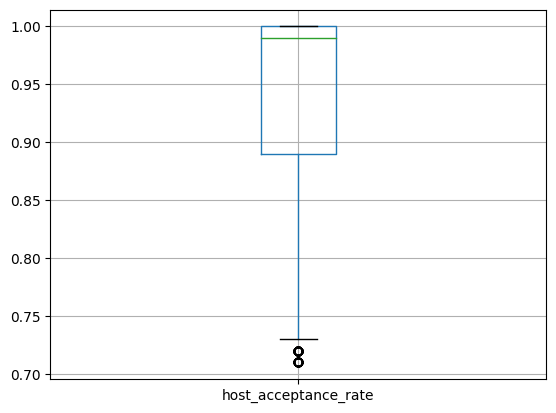

In [413]:
# Comprobamos la distribución de nuestra variable
import matplotlib.pyplot as plt
california.boxplot(column=["host_acceptance_rate"])
plt.show()

#### Debido a que nuestro tratamiento de outliers filtro los valores por debajo de 50%, haremos el filtro valores de 90%. 

In [414]:
pd.reset_option('display.max_rows')
california_acceptance = california[california["host_acceptance_rate"] > 0.90]
california_acceptance

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,ï»¿id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,"San Francisco, CA",We are a family of four that live upstairs. W...,within an hour,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,"['email', 'phone']",t,t,"San Francisco, California, United States",Western Addition,Entire serviced apartment,Entire home/apt,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f,958.0,2.020000e+13,1169.0,1.0,1.00,1.0,1.0,37.770280,-122.433170,3.0,1.0,1.0,2.0,202.0,2.0,30.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,8,22,30,128,5.0,1.0,0.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
3,3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,Desconocido,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,02/07/2009,"San Francisco, CA",I'm an Interior Stylist living in SF. \r\n\r\n...,within a few hours,f,https://a0.muscache.com/im/pictures/user/6e05b...,https://a0.muscache.com/im/pictures/user/6e05b...,Alamo Square,"['email', 'phone']",t,t,Desconocido,Western Addition,Entire condo,Entire home/apt,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f,8339.0,2.020000e+13,24215.0,1.0,1.00,2.0,6.0,37.775640,-122.436420,4.0,1.0,2.0,2.0,140.0,9.0,91.0,9.0,9.0,91.0,91.0,9.0,91.0,30,60,90,365,28.0,0.0,0.0,4.87,4.88,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
5,5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/656263,Noreen,02/06/2011,"San Francisco, CA","Like most San Franciscans, eating good food an...",within an hour,f,https://a0.muscache.com/im/users/656263/profil...,https://a0.muscache.com/im/users/656263/profil...,Richmond District,"['email', 'phone', 'work_email']",t,t,"San Francisco, California, United States",Outer Richmond,Entire condo,Entire home/apt,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f,142177.0,2.020000e+13,656263.0,1.0,0.95,1.0,2.0,37.784400,-122.479320,4.0,1.0,2.0,2.0,259.0,5.0,25.0,5.0,5.0,25.0,25.0,5.0,25.0,11,32,32,32

In [415]:
# Comprobamos que el filtrado se haya realizado correctamente 
california_acceptance["host_acceptance_rate"].describe()

count    5102.000000
mean        0.984935
std         0.024775
min         0.910000
25%         0.980000
50%         1.000000
75%         1.000000
max         1.000000
Name: host_acceptance_rate, dtype: float64

### Registros con categoría “superhost”

In [416]:
california_super =california[california["host_is_superhost"] == "t"]

In [417]:
# Comprobamos el filtrado exitoso 
california_super["host_is_superhost"].value_counts()

t    2869
Name: host_is_superhost, dtype: int64

### Los registros que no hallan verificado identidad “ not identity_verified”

In [418]:
california_identity =california[california["host_identity_verified"] == "f"]

In [419]:
# Comprobamos el filtrado exitoso 
california_identity["host_identity_verified"].value_counts()

f    830
Name: host_identity_verified, dtype: int64

In [420]:
california["room_type"]

0       Entire home/apt
1       Entire home/apt
2          Private room
3       Entire home/apt
4          Private room
             ...       
6931    Entire home/apt
6932    Entire home/apt
6933       Private room
6934       Private room
6935    Entire home/apt
Name: room_type, Length: 6936, dtype: object

### Los registros cuyo room_type = “Private room” y “Hotel room”

In [421]:
california_rotype = california[(california["room_type"] == "Private room") | (california["room_type"] == "Hotel room")]

In [422]:
# Comprobamos que el filtrado se haya realizado correctamente
california_rotype["room_type"].value_counts()

Private room    2359
Hotel room        52
Name: room_type, dtype: int64

### Los registros que cuenten con bathroom > 1

#### Debido a que nuestro tratamiento de outliers sólo nos dejó con valores de 1 para esta columna. UItilizaremos los datos originales para este filtro. 

In [423]:
california_bat =california[california["bathrooms_text"] > 1.0]
california_bat

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,ï»¿id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


### Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”

#### Ajustamos el valor del precio debido a que se asume que las cantidades se expresan en dólares. Se propone un precio máximo de 400 dólares

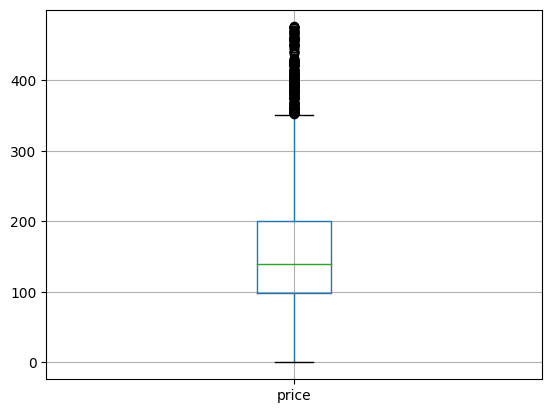

In [424]:
# Comprobamos la distribución de nuestra variable
import matplotlib.pyplot as plt
california.boxplot(column=["price"])
plt.show()

In [425]:
california_ehome = california[(california["price"] > 400) & (california["room_type"] == "Entire home/apt")]
california_ehome

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,ï»¿id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
8,8,https://www.airbnb.com/rooms/491867,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,"Nearby market: Right out the front door, righ...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/969518,Sona,14/08/2011,"San Francisco, CA",I am American of Indian decent and I live here...,within a few hours,t,https://a0.muscache.com/im/users/969518/profil...,https://a0.muscache.com/im/users/969518/profil...,Lower Haight,"['email', 'phone']",t,t,"San Francisco, California, United States",Western Addition,Entire condo,Entire home/apt,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f,491867.0,2.020000e+13,969518.0,1.000000,1.0,2.0,3.0,37.771960,-122.434770,5.0,1.0,3.0,3.0,425.0,2.0,31.0,2.0,2.0,31.0,31.0,2.0,31.0,0,2,7,7,56.0,14.0,1.0,4.85,4.86,4.86,4.98,4.91,4.91,4.75,1.0,1.0,0.0,0.0,0.44
47,47,https://www.airbnb.com/rooms/531151,06/03/2023,city scrape,Sunny 4-Bedroom Family Home Central SF Location,Enjoy the best of urban village living in our ...,Bernal Heights is a chic urban village full of...,https://a0.muscache.com/pictures/96219888/c903...,https://www.airbnb.com/users/show/2608908,Jennifer,11/06/2012,"San Francisco, CA",We are a tight-knit family of four with two wo...,within an hour,f,https://a0.muscache.com/im/pictures/user/ef232...,https://a0.muscache.com/im/pictures/user/ef232...,Bernal Heights,"['email', 'phone']",t,t,"San Francisco, California, United States",Bernal Heights,Entire home,Entire home/apt,"[""Self check-in"", ""Shampoo"", ""Free parking on ...",t,06/03/2023,30/07/2014,31/07/2022,STR-0000603,t,531151.0,2.020000e+13,2608908.0,1.000000,1.0,1.0,2.0,37.734660,-122.416940,2.0,1.0,1.0,1.0,423.0,3.0,21.0,3.0,4.0,21.0,21.0,3.0,21.0,2,7,7,29,24.0,4.0,0.0,4.92,4.88,4.83,5.00,4.92,4.58,4.75,1.0,1.0,0.0,0.0,0.23
52,52,https://www.airbnb.com/rooms/561148,06/03/2023,city scrape,"Great Family Home, Quiet Street, Close to GG Park","We love our home and hope you will, too. It's ...",We are in a great SF neighborhood. We are on a...,https://a0.muscache.com/pictures/8664488/cff92...,https://www.airbnb.com/users/show/2758480,Steve,27/06/2012,"San Francisco, CA",I'm a native San Francisco and we have raised ...,within a few hours,f,https://a0.muscache.com/im/users/2758480/profi...,https://a0.muscache.com/im/users/2758480/profi...,Richmond District,"['email', 'phone']",t,t,"San Francisco, California, United States",Inner Richmond,Entire home,Entire home/apt,"[""Oven"", ""Self check-in"", ""HDTV with standard ...",t,06/03/2023,13/08/2012,06/10/2022,City Registration Pending,f,561148.0,2.020000e+13,2758480.0,1.000000,0.9,1.0,1.0,

### Los registros cuyo review_scores_cleanliness > 4.5

In [426]:
california_cleanscore =california[california["review_scores_cleanliness"] > 4.5]
california_cleanscore

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,ï»¿id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,"San Francisco, CA",We are a family of four that live upstairs. W...,within an hour,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,"['email', 'phone']",t,t,"San Francisco, California, United States",Western Addition,Entire serviced apartment,Entire home/apt,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f,958.0,2.020000e+13,1169.0,1.000000,1.000000,1.0,1.0,37.770280,-122.433170,3.0,1.0,1.0,2.0,202.0,2.0,30.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,8,22,30,128,5.0,1.0,0.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,02/03/2009,"San Francisco, CA",Philip: English transplant to the Bay Area and...,within a few hours,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.com/im/users/8904/profile_...,Bernal Heights,"['email', 'phone', 'work_email']",t,t,"San Francisco, California, United States",Bernal Heights,Entire rental unit,Entire home/apt,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",t,06/03/2023,03/05/2009,06/08/2017,Desconocido,f,5858.0,2.020000e+13,8904.0,1.000000,0.710000,2.0,2.0,37.744740,-122.420890,4.0,1.0,2.0,2.0,235.0,30.0,60.0,30.0,30.0,60.0,60.0,30.0,60.0,30,60,90,365,111.0,0.0,0.0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
2,2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,17/06/2009,"San Francisco, CA",7 minutes walk to UCSF hospital & school campu...,within an hour,f,https://a0.muscache.com/im/users/21994/profile...,https://a0.muscache.com/im/users/21994/profile...,Cole Valley,"['email', 'phone']",t,t,"San Francisco, California, United States",Haight Ashbury,Private room in rental unit,Private room,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,Desconocido,f,8142.0,2.020000e+13,21994.0,1.00000

### Los registros cuyo review_scores_value > 4.9

In [427]:
california_score =california[california["review_scores_value"] > 4.9]
california_score

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,ï»¿id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,"San Francisco, CA",We are a family of four that live upstairs. W...,within an hour,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,"['email', 'phone']",t,t,"San Francisco, California, United States",Western Addition,Entire serviced apartment,Entire home/apt,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f,958.0,2.020000e+13,1169.0,1.000000,1.000000,1.0,1.0,37.770280,-122.433170,3.0,1.0,1.0,2.0,202.0,2.0,30.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,8,22,30,128,5.0,1.0,0.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
2,2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,17/06/2009,"San Francisco, CA",7 minutes walk to UCSF hospital & school campu...,within an hour,f,https://a0.muscache.com/im/users/21994/profile...,https://a0.muscache.com/im/users/21994/profile...,Cole Valley,"['email', 'phone']",t,t,"San Francisco, California, United States",Haight Ashbury,Private room in rental unit,Private room,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,Desconocido,f,8142.0,2.020000e+13,21994.0,1.000000,0.730000,13.0,14.0,37.765550,-122.452130,1.0,1.0,1.0,1.0,56.0,32.0,90.0,32.0,32.0,90.0,90.0,32.0,90.0,30,60,90,365,9.0,1.0,0.0,4.67,5.00,5.00,5.00,4.78,4.67,4.67,13.0,0.0,0.0,0.0,0.09
3,3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,Desconocido,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,02/07/2009,"San Francisco, CA",I'm an Interior Stylist living in SF. \r\n\r\n...,within a few hours,f,https://a0.muscache.com/im/pictures/user/6e05b...,https://a0.muscache.com/im/pictures/user/6e05b...,Alamo Square,"['email', 'phone']",t,t,Desconocido,Western Addition,Entire condo,Entire home/apt,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f,8339.0,2.020000e+13,24215.0,1.000000,1.000000,2.0,6.0,37.775640,-122.436420,4.0,1.0,2.0,2.0,140.0,9.0,91.0,9.0,9.0,91.

### Los registros cuya availability_365< 100

In [428]:
california_ava =california[california["availability_365"] >100]
california_ava

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,ï»¿id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,"San Francisco, CA",We are a family of four that live upstairs. W...,within an hour,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,"['email', 'phone']",t,t,"San Francisco, California, United States",Western Addition,Entire serviced apartment,Entire home/apt,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f,958.0,2.020000e+13,1169.0,1.000000,1.000000,1.0,1.0,37.770280,-122.433170,3.0,1.0,1.0,2.0,202.0,2.0,30.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,8,22,30,128,5.0,1.0,0.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,02/03/2009,"San Francisco, CA",Philip: English transplant to the Bay Area and...,within a few hours,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.com/im/users/8904/profile_...,Bernal Heights,"['email', 'phone', 'work_email']",t,t,"San Francisco, California, United States",Bernal Heights,Entire rental unit,Entire home/apt,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",t,06/03/2023,03/05/2009,06/08/2017,Desconocido,f,5858.0,2.020000e+13,8904.0,1.000000,0.710000,2.0,2.0,37.744740,-122.420890,4.0,1.0,2.0,2.0,235.0,30.0,60.0,30.0,30.0,60.0,60.0,30.0,60.0,30,60,90,365,111.0,0.0,0.0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
2,2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,17/06/2009,"San Francisco, CA",7 minutes walk to UCSF hospital & school campu...,within an hour,f,https://a0.muscache.com/im/users/21994/profile...,https://a0.muscache.com/im/users/21994/profile...,Cole Valley,"['email', 'phone']",t,t,"San Francisco, California, United States",Haight Ashbury,Private room in rental unit,Private room,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,Desconocido,f,8142.0,2.020000e+13,21994.0,1.00000

### Los registros cuya host_response_time sea “within an hour”

In [429]:
california_time =california[california["host_response_time"] == "within an hour"]
california_time

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,ï»¿id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,"San Francisco, CA",We are a family of four that live upstairs. W...,within an hour,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,"['email', 'phone']",t,t,"San Francisco, California, United States",Western Addition,Entire serviced apartment,Entire home/apt,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f,958.0,2.020000e+13,1169.0,1.0,1.000000,1.0,1.0,37.770280,-122.433170,3.0,1.0,1.0,2.0,202.0,2.0,30.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,8,22,30,128,5.0,1.0,0.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
2,2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,17/06/2009,"San Francisco, CA",7 minutes walk to UCSF hospital & school campu...,within an hour,f,https://a0.muscache.com/im/users/21994/profile...,https://a0.muscache.com/im/users/21994/profile...,Cole Valley,"['email', 'phone']",t,t,"San Francisco, California, United States",Haight Ashbury,Private room in rental unit,Private room,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,Desconocido,f,8142.0,2.020000e+13,21994.0,1.0,0.730000,13.0,14.0,37.765550,-122.452130,1.0,1.0,1.0,1.0,56.0,32.0,90.0,32.0,32.0,90.0,90.0,32.0,90.0,30,60,90,365,9.0,1.0,0.0,4.67,5.00,5.00,5.00,4.78,4.67,4.67,13.0,0.0,0.0,0.0,0.09
4,4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,27/01/2009,"San Francisco, CA",Ivan is a publisher of a book for 4 year olds....,within an hour,t,https://a0.muscache.com/im/users/7149/profile_...,https://a0.muscache.com/im/users/7149/profile_...,Mission District,"['email', 'phone', 'work_email']",t,t,"San Francisco, California, United States",Mission,Private room in condo,Private room,"[""Paid parking garage off premises"", ""Luggage ...",t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f,8739.0,2.020000e+13,7149.0,1.0,0.900

# Girona 

In [430]:
girona = pd.read_csv("girona_clean.csv")
girona.head(3)

<ipython-input-430-5ba65c69fafc>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  girona = pd.read_csv("girona_clean.csv")


,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,24/11/2009,"Girona, Spain",It's hard to define oneself in such a narrow s...,within an hour,t,https://a0.muscache.com/im/pictures/user/fbea5...,https://a0.muscache.com/im/pictures/user/fbea5...,Desconocido,"['email', 'phone', 'work_email']",t,t,"Girona, CT, Spain",Girona,Private room in condo,Private room,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f,14551.0,2.023030e+13,57237.0,1.0,0.9,1.0,5.0,41.99650,2.83646,2.0,1.0,1.0,1.0,42.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,0.0,18.0,293.0,2.0,1.0,0.0,4.82,4.81,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,26/05/2013,"Vidreres, Spain","Adoro viajar, ver mundo y aprender de ello.",within a day,f,https://a0.muscache.com/im/pictures/user/e7917...,https://a0.muscache.com/im/pictures/user/e7917...,Desconocido,"['email', 'phone']",t,t,"Vidreres, Catalonia, Spain",Vidreres,Private room in loft,Private room,"[""Free parking on premises"", ""Refrigerator"", ""...",t,31/03/2023,01/08/2013,26/06/2022,Desconocido,f,1205757.0,2.023030e+13,6586355.0,1.0,1.0,1.0,1.0,41.79304,2.77412,2.0,1.0,1.0,1.0,47.0,2.0,30.0,2.0,2.0,30.0,30.0,2.0,30.0,9.0,39.0,69.0,282.0,2.0,2.0,0.0,4.80,4.76,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
2,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,Desconocido,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,28/05/2013,"Catalonia, Spain",Avec mon compagnon nous vivons depuis 2003 en ...,within a day,f,https://a0.muscache.com/im/pictures/user/f0c51...,https://a0.muscache.com/im/pictures/user/f0c51...,Desconocido,"['email', 'phone']",t,f,Desconocido,L'Escala,Entire condo,Entire home/apt,"[""Air conditioning"", ""Free parking on premises...",t,01/04/2023,10/06/2013,30/12/2022,Desconocido,f,1212820.0,2.023030e+13,6620645.0,1.0,0.8,2.0,3.0,42.11284,3.16670,4.0,1.0,1.0,2.0,74.0,2.0,30.0,2.0,7.0,7.0,30.0,2.3,29.1,23.0,47.0,77.0,315.0,2.0,4.0,0.0,4.46,4.68,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62


In [431]:
# Comprobamos el correcto procesamiento de los datos 
pd.set_option('display.max_rows', None)
girona.isna().sum()

Unnamed: 0                                      0
listing_url                                     0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              1
host_is_superhost                               1
host_thumbnail_url                              1
host_picture_url                                1
host_neighbourhood                              1
host_verifications                              1
host_has_profile_pic                            1


In [432]:
# Por algún motivo se añadieron 1 o dos datos nulos para cada columna numérica. Simplemente nos deshacemos de ellos
girona = girona.dropna()

### Registros con host_acceptance_rate> 90%

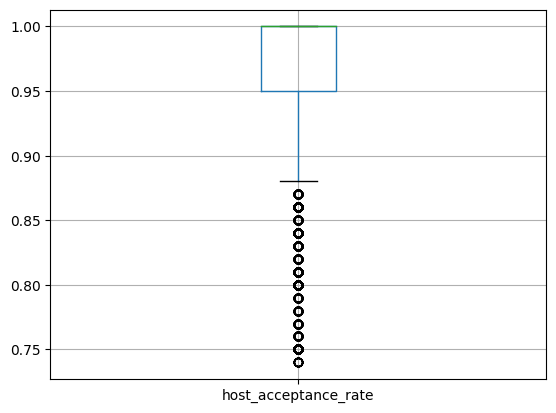

In [433]:
# Comprobamos la distribución de nuestra variable
import matplotlib.pyplot as plt
girona.boxplot(column=["host_acceptance_rate"])
plt.show()

In [434]:
california["host_acceptance_rate"].describe()

count    6936.000000
mean        0.946012
std         0.074492
min         0.710000
25%         0.890000
50%         0.990000
75%         1.000000
max         1.000000
Name: host_acceptance_rate, dtype: float64

In [435]:
# Construimos el filtro 
pd.reset_option('display.max_rows')
girona_acceptance = girona[girona["host_acceptance_rate"] > 0.90]
girona_acceptance.head(3)

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,26/05/2013,"Vidreres, Spain","Adoro viajar, ver mundo y aprender de ello.",within a day,f,https://a0.muscache.com/im/pictures/user/e7917...,https://a0.muscache.com/im/pictures/user/e7917...,Desconocido,"['email', 'phone']",t,t,"Vidreres, Catalonia, Spain",Vidreres,Private room in loft,Private room,"[""Free parking on premises"", ""Refrigerator"", ""...",t,31/03/2023,01/08/2013,26/06/2022,Desconocido,f,1205757.0,2.023030e+13,6586355.0,1.00000,1.00,1.0,1.0,41.79304,2.77412,2.0,1.0,1.0,1.0,47.0,2.0,30.0,2.0,2.0,30.0,30.0,2.0,30.0,9.0,39.0,69.0,282.0,2.0,2.0,0.0,4.80,4.76,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
3,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,Roberto,26/09/2012,"Sant Climent Sescebes, Spain","Soy una persona abierta, a que le gusta conoce...",within a few hours,f,https://a0.muscache.com/im/pictures/user/eb987...,https://a0.muscache.com/im/pictures/user/eb987...,Desconocido,"['email', 'phone', 'work_email']",t,t,"St Climent Sescebes, Catalonia, Spain",Sant Climent Sescebes,Private room in bed and breakfast,Private room,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",t,31/03/2023,23/08/2013,29/08/2022,PG000794,t,751638.0,2.023030e+13,3680160.0,1.00000,0.91,6.0,6.0,42.36958,2.98030,2.0,1.0,1.0,2.0,45.0,2.0,21.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,23.0,44.0,65.0,248.0,9.0,3.0,0.0,4.88,4.75,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
4,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,25/07/2010,"CataluÃ±a, Spain","""Hi, Marisa. I look forward to meeting you in ...",Desconocido,f,https://a0.muscache.com/im/users/180072/profil...,https://a0.muscache.com/im/users/180072/profil...,La Sagrada FamÃ­lia,"['email', 'phone']",t,t,"El Port de la Selva, Catalonia, Spain",El Port de la Selva,Entire rental unit,Entire home/apt,"[""Free parking on premises"", ""Refrigerator"", ""...",t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f,41342.0,2.023030e+13,180072.0,0.94362,1.00,2.0,3.0,42.3465

In [436]:
# Comprobamos que el filtrado se haya realizado correctamente 
girona_acceptance["host_acceptance_rate"].describe()

count    16142.000000
mean         0.987438
std          0.022402
min          0.910000
25%          0.990000
50%          1.000000
75%          1.000000
max          1.000000
Name: host_acceptance_rate, dtype: float64

### Registros con categoría “superhost”

In [437]:
girona_super =girona[girona["host_is_superhost"] == "t"]

In [438]:
# Comprobamos el filtrado exitoso 
girona_super["host_is_superhost"].describe()

count     3056
unique       1
top          t
freq      3056
Name: host_is_superhost, dtype: object

### Los registros que no hallan verificado identidad “ not identity_verified”

In [439]:
girona_identity =girona[girona["host_identity_verified"] == "f"]

In [440]:
# Comprobamos el filtrado exitoso 
girona_identity["host_identity_verified"].value_counts()

f    2261
Name: host_identity_verified, dtype: int64

### Los registros cuyo room_type = “Private room” y “Hotel room”

In [441]:
girona_rotype = girona[(girona["room_type"] == "Private room") | (girona["room_type"] == "Hotel room")]

In [442]:
# Comprobamos que el filtrado se haya realizado correctamente
girona_rotype["room_type"].value_counts()

Private room    1233
Hotel room        50
Name: room_type, dtype: int64

### Los registros que cuenten con bathroom > 1

#### Debido a que nuestro tratamiento de outliers sólo nos dejó con valores de 1 para esta columna. UItilizaremos los datos originales para este filtro. 

In [443]:
girona_bat =girona[girona["bathrooms_text"] > 1.0]
girona_bat

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,7,https://www.airbnb.com/rooms/1215790,01/04/2023,city scrape,"100m FROM THE BEACH, with TERRACE","Big apartment with terrace (7 people), next to...",Desconocido,https://a0.muscache.com/pictures/ea54a005-62f2...,https://www.airbnb.com/users/show/3149645,Cristina,03/08/2012,"Barcelona, Spain","We're photographers. We love travelling, music...",Desconocido,f,https://a0.muscache.com/im/users/3149645/profi...,https://a0.muscache.com/im/users/3149645/profi...,Desconocido,"['email', 'phone']",t,f,Desconocido,PalamÃ³s,Entire rental unit,Entire home/apt,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Washer"", ""F...",t,01/04/2023,01/07/2013,18/02/2018,HUTG-017955,f,1.215790e+06,2.023030e+13,3149645.0,0.94362,0.895187,1.0,1.0,41.849840,3.126500,7.0,2.0,3.0,5.0,60.0,7.0,1125.0,7.0,7.0,1125.0,1125.0,7.0,1125.0,0.0,28.0,28.0,56.0,10.0,0.0,0.0,4.11,4.56,4.78,4.89,5.00,4.56,4.11,1.0,1.0,0.0,0.0,0.08
9,9,https://www.airbnb.com/rooms/1222762,31/03/2023,city scrape,house in a quiet village,Enjoy this spacious house in a quiet village o...,Desconocido,https://a0.muscache.com/pictures/18516841/e9fe...,https://www.airbnb.com/users/show/6404885,Maria,15/05/2013,"Ordis, Spain",He viscut tota la meva vida en aquesta zona . ...,Desconocido,f,https://a0.muscache.com/im/users/6404885/profi...,https://a0.muscache.com/im/users/6404885/profi...,Desconocido,"['email', 'phone']",t,f,Desconocido,Ordis,Entire home,Entire home/apt,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wa...",t,31/03/2023,19/08/2013,14/09/2022,HUTG-012585,f,1.222762e+06,2.023030e+13,6404885.0,0.94362,1.000000,1.0,1.0,42.219040,2.907440,5.0,2.0,3.0,4.0,65.0,2.0,30.0,2.0,2.0,30.0,30.0,2.0,30.0,28.0,58.0,88.0,363.0,8.0,4.0,0.0,4.57,4.75,4.38,4.88,5.00,4.63,4.63,1.0,1.0,0.0,0.0,0.07
11,11,https://www.airbnb.com/rooms/48764,31/03/2023,city scrape,18th C Stone House near Costa Brava,Casa Fluvia is a charming stone village house ...,Torroella de FluviÃ¡ is a small peaceful rural...,https://a0.muscache.com/pictures/19824290/9c7a...,https://www.airbnb.com/users/show/220145,Dick And Ann,01/09/2010,"Barcelona, Spain",We have both been living in Barcelona for over...,within a few hours,f,https://a0.muscache.com/im/users/220145/profil...,https://a0.muscache.com/im/users/220145/profil...,Desconocido,"['email', 'phone']",t,t,"Torroella de FluviÃ , Catalonia, Spain",Torroella de FluviÃ,Entire home,Entire home/apt,"[""Refrigerator"", ""Long term stays allowed"", ""S...",t,31/03/2023,04/06/2011,13/08/2022,HUTG-000207,f,4.876400e+04,2.023030e+13,220145.0,1.00000,0.800000,1.0,2.0,42.176050,3.039740,8.0,2.0,4.0,5.0,120.0,7.0,120.0,7.0,7.0,90.0,120.0,7.0,110.5,0.0,0.0,1.0,28.0,34.0,3.0,0.0,4.84,4.88,4.88,4.97,4.97,4.70,4.82,1.0,1.0,0.0,0.0,0.24
14,1

### Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”

#### Ajustamos el valor del precio debido a que se asume que las cantidades se expresan en euros. Se propone un precio máximo de 300 euros

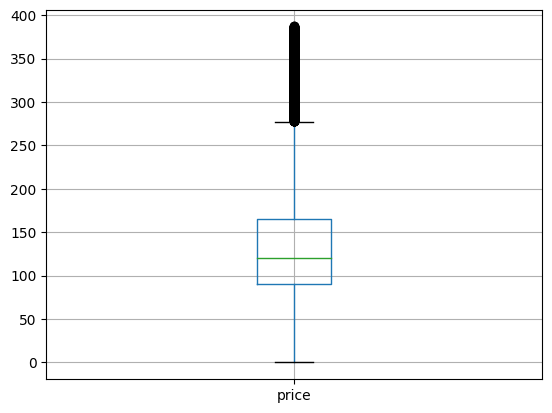

In [444]:
# Comprobamos la distribución de nuestra variable
import matplotlib.pyplot as plt
girona.boxplot(column=["price"])
plt.show()

In [445]:
girona_ehome = girona[(girona["price"] > 300) & (girona["room_type"] == "Entire home/apt")]
girona_ehome

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
22,22,https://www.airbnb.com/rooms/1234785,01/04/2023,city scrape,"Begur, house w/garden & pool, view to sea & ca...","200sqm house with garage, private garden and s...",Close to Begur you'll be free to choose betwee...,https://a0.muscache.com/pictures/111fefa4-3f14...,https://www.airbnb.com/users/show/6732502,Emmanuelle,04/06/2013,"Catalonia, Spain",Somos una pareja francesa de 55 aÃ±os afincada...,Desconocido,f,https://a0.muscache.com/im/users/6732502/profi...,https://a0.muscache.com/im/users/6732502/profi...,Desconocido,"['email', 'phone']",t,t,"Begur, Catalonia, Spain",Begur,Entire home,Entire home/apt,"[""Shared pool"", ""Free parking on premises"", ""R...",t,01/04/2023,30/08/2021,25/08/2022,HUTG-026895,f,1.234785e+06,2.023030e+13,6732502.0,0.94362,1.000000,2.0,2.0,41.951880,3.202970,6.0,2.0,3.0,4.0,335.0,6.0,28.0,6.0,6.0,28.0,28.0,6.0,28.0,0.0,0.0,0.0,10.0,2.0,1.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.0,1.0,0.0,0.0,0.10
25,25,https://www.airbnb.com/rooms/771850,01/04/2023,previous scrape,Luxurious Villa in La Costa Brava,<b>The space</b><br />Located in the heart of ...,Desconocido,https://a0.muscache.com/pictures/10780610/467c...,https://www.airbnb.com/users/show/4072871,Marta,06/11/2012,"Madrid, Spain",Soy de Barcelona pero vivo en Madrid por trabajo,Desconocido,f,https://a0.muscache.com/im/users/4072871/profi...,https://a0.muscache.com/im/users/4072871/profi...,Desconocido,"['email', 'phone']",t,t,Desconocido,Castell-Platja d'Aro,Entire home,Entire home/apt,"[""Pool"", ""Kitchen"", ""Air conditioning"", ""Lugga...",f,01/04/2023,00/00/00,00/00/00,Desconocido,f,7.718500e+05,2.023030e+13,4072871.0,0.94362,0.895187,1.0,3.0,41.794490,3.052690,6.0,3.0,3.0,3.0,350.0,2.0,1000.0,2.0,6.0,1000.0,1000.0,3.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,0.13
39,39,https://www.airbnb.com/rooms/131374,31/03/2023,city scrape,"Charming house in Costa Brava, near Girona","Village house of 1760 completely renovated, lo...","Riudarenes is a small village of La Selva, Gir...",https://a0.muscache.com/pictures/7a619650-7ce4...,https://www.airbnb.com/users/show/646551,JesÃºs,31/05/2011,"Terrassa, Spain",Soc interiorista de professiÃ³ i cuiner per pa...,within an hour,f,https://a0.muscache.com/im/pictures/user/6d908...,https://a0.muscache.com/im/pictures/user/6d908...,Desconocido,"['email', 'phone', 'work_email']",t,t,"Riudarenes, Catalonia, Spain",Riudarenes,Entire home,Entire home/apt,"[""Free parking on premises"", ""Pack ’n play/Tra...",t,31/03/2023,20/08/2014,01/11/2022,PG000877,t,1.313740e+05,2.023030e+13,646551.0,1.00000,1.000000,2.0,3.0,41.820690,2.717640,8.0,3.0,4.0,5.0,306.0,2.0,30.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,27.0,54.0,75.0,321.

### Los registros cuyo review_scores_cleanliness > 4.5

In [446]:
girona_cleanscore =girona[girona["review_scores_cleanliness"] > 4.5]
girona_cleanscore

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,24/11/2009,"Girona, Spain",It's hard to define oneself in such a narrow s...,within an hour,t,https://a0.muscache.com/im/pictures/user/fbea5...,https://a0.muscache.com/im/pictures/user/fbea5...,Desconocido,"['email', 'phone', 'work_email']",t,t,"Girona, CT, Spain",Girona,Private room in condo,Private room,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f,1.455100e+04,2.023030e+13,57237.0,1.00000,0.90,1.0,5.0,41.996500,2.836460,2.0,1.0,1.0,1.0,42.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,0.0,18.0,293.0,2.0,1.0,0.0,4.82,4.81,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,26/05/2013,"Vidreres, Spain","Adoro viajar, ver mundo y aprender de ello.",within a day,f,https://a0.muscache.com/im/pictures/user/e7917...,https://a0.muscache.com/im/pictures/user/e7917...,Desconocido,"['email', 'phone']",t,t,"Vidreres, Catalonia, Spain",Vidreres,Private room in loft,Private room,"[""Free parking on premises"", ""Refrigerator"", ""...",t,31/03/2023,01/08/2013,26/06/2022,Desconocido,f,1.205757e+06,2.023030e+13,6586355.0,1.00000,1.00,1.0,1.0,41.793040,2.774120,2.0,1.0,1.0,1.0,47.0,2.0,30.0,2.0,2.0,30.0,30.0,2.0,30.0,9.0,39.0,69.0,282.0,2.0,2.0,0.0,4.80,4.76,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
4,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,25/07/2010,"CataluÃ±a, Spain","""Hi, Marisa. I look forward to meeting you in ...",Desconocido,f,https://a0.muscache.com/im/users/180072/profil...,https://a0.muscache.com/im/users/180072/profil...,La Sagrada FamÃ­lia,"['email', 'phone']",t,t,"El Port de la Selva, Catalonia, Spain",El Port de la Selva,Entire rental unit,Entire home/apt,"[""Free parking on premises"", ""Refrigerator"", ""...",t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f,4.134200e+04,2.023030e+13,180072.0,0.94362,1.00,2.0,3.0,42.346550,3.204630,4.0,1.0,1.0,1.0,120.0,7.0,32.0,7.0,7.0,32.0

### Los registros cuyo review_scores_value > 4.9

In [478]:
girona_score =girona[girona["review_scores_value"] > 4.9]
girona_score

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
15,15,https://www.airbnb.com/rooms/93343,01/04/2023,city scrape,Alquiler de casa en La Costa Brava cerca de playa,Siguiendo con nuestra linea de alojamientos co...,Localizada a:<br />Playa : 700 m<br />Supermer...,https://a0.muscache.com/pictures/6656368/7038d...,https://www.airbnb.com/users/show/477826,Francisco,01/04/2011,"Barcelona, Spain",Naturcasas te ofrece no solo las comodidades ...,a few days or more,f,https://a0.muscache.com/im/pictures/user/0f064...,https://a0.muscache.com/im/pictures/user/0f064...,Desconocido,"['email', 'phone']",t,t,"L'Escala, Catalonia, Spain",L'Escala,Entire home,Entire home/apt,"[""Air conditioning"", ""Free parking on premises...",t,01/04/2023,00/00/00,00/00/00,HUTG-001447,f,9.334300e+04,2.023030e+13,477826.0,1.00000,1.000000,4.0,6.0,42.104050,3.149360,7.0,2.0,3.0,5.0,173.0,2.0,365.0,2.0,2.0,365.0,365.0,2.0,365.0,26.0,56.0,84.0,84.0,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.0,5.0,5.00,3.0,3.0,0.0,0.0,0.13
22,22,https://www.airbnb.com/rooms/1234785,01/04/2023,city scrape,"Begur, house w/garden & pool, view to sea & ca...","200sqm house with garage, private garden and s...",Close to Begur you'll be free to choose betwee...,https://a0.muscache.com/pictures/111fefa4-3f14...,https://www.airbnb.com/users/show/6732502,Emmanuelle,04/06/2013,"Catalonia, Spain",Somos una pareja francesa de 55 aÃ±os afincada...,Desconocido,f,https://a0.muscache.com/im/users/6732502/profi...,https://a0.muscache.com/im/users/6732502/profi...,Desconocido,"['email', 'phone']",t,t,"Begur, Catalonia, Spain",Begur,Entire home,Entire home/apt,"[""Shared pool"", ""Free parking on premises"", ""R...",t,01/04/2023,30/08/2021,25/08/2022,HUTG-026895,f,1.234785e+06,2.023030e+13,6732502.0,0.94362,1.000000,2.0,2.0,41.951880,3.202970,6.0,2.0,3.0,4.0,335.0,6.0,28.0,6.0,6.0,28.0,28.0,6.0,28.0,0.0,0.0,0.0,10.0,2.0,1.0,0.0,5.00,5.00,5.00,5.00,5.0,5.0,5.00,2.0,1.0,0.0,0.0,0.10
25,25,https://www.airbnb.com/rooms/771850,01/04/2023,previous scrape,Luxurious Villa in La Costa Brava,<b>The space</b><br />Located in the heart of ...,Desconocido,https://a0.muscache.com/pictures/10780610/467c...,https://www.airbnb.com/users/show/4072871,Marta,06/11/2012,"Madrid, Spain",Soy de Barcelona pero vivo en Madrid por trabajo,Desconocido,f,https://a0.muscache.com/im/users/4072871/profi...,https://a0.muscache.com/im/users/4072871/profi...,Desconocido,"['email', 'phone']",t,t,Desconocido,Castell-Platja d'Aro,Entire home,Entire home/apt,"[""Pool"", ""Kitchen"", ""Air conditioning"", ""Lugga...",f,01/04/2023,00/00/00,00/00/00,Desconocido,f,7.718500e+05,2.023030e+13,4072871.0,0.94362,0.895187,1.0,3.0,41.794490,3.052690,6.0,3.0,3.0,3.0,350.0,2.0,1000.0,2.0,6.0,1000.0,1000.0,3.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,

### Los registros cuya availability_365< 100

In [448]:
girona_ava =girona[girona["availability_365"] > 100]
girona_ava

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,24/11/2009,"Girona, Spain",It's hard to define oneself in such a narrow s...,within an hour,t,https://a0.muscache.com/im/pictures/user/fbea5...,https://a0.muscache.com/im/pictures/user/fbea5...,Desconocido,"['email', 'phone', 'work_email']",t,t,"Girona, CT, Spain",Girona,Private room in condo,Private room,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f,1.455100e+04,2.023030e+13,57237.0,1.00000,0.900000,1.0,5.0,41.996500,2.836460,2.0,1.0,1.0,1.0,42.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,0.0,18.0,293.0,2.0,1.0,0.0,4.82,4.81,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,26/05/2013,"Vidreres, Spain","Adoro viajar, ver mundo y aprender de ello.",within a day,f,https://a0.muscache.com/im/pictures/user/e7917...,https://a0.muscache.com/im/pictures/user/e7917...,Desconocido,"['email', 'phone']",t,t,"Vidreres, Catalonia, Spain",Vidreres,Private room in loft,Private room,"[""Free parking on premises"", ""Refrigerator"", ""...",t,31/03/2023,01/08/2013,26/06/2022,Desconocido,f,1.205757e+06,2.023030e+13,6586355.0,1.00000,1.000000,1.0,1.0,41.793040,2.774120,2.0,1.0,1.0,1.0,47.0,2.0,30.0,2.0,2.0,30.0,30.0,2.0,30.0,9.0,39.0,69.0,282.0,2.0,2.0,0.0,4.80,4.76,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
2,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,Desconocido,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,28/05/2013,"Catalonia, Spain",Avec mon compagnon nous vivons depuis 2003 en ...,within a day,f,https://a0.muscache.com/im/pictures/user/f0c51...,https://a0.muscache.com/im/pictures/user/f0c51...,Desconocido,"['email', 'phone']",t,f,Desconocido,L'Escala,Entire condo,Entire home/apt,"[""Air conditioning"", ""Free parking on premises...",t,01/04/2023,10/06/2013,30/12/2022,Desconocido,f,1.212820e+06,2.023030e+13,6620645.0,1.00000,0.800000,2.0,3.0,42.112840,3.166700,4.0,1.0,1.0,2.0,74.0,2.0,30.0,2.0,7.0,7.0,30.0,2.3,29.1,23.0,47.0,77.0,315.0,2.0,4.0,0.0,4.46,4.68,4.31,4.81,4.76,4.74,4.32,

### Los registros cuya host_response_time sea “within an hour”

In [449]:
girona_time =girona[girona["host_response_time"] == "within an hour"]
girona_time

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,24/11/2009,"Girona, Spain",It's hard to define oneself in such a narrow s...,within an hour,t,https://a0.muscache.com/im/pictures/user/fbea5...,https://a0.muscache.com/im/pictures/user/fbea5...,Desconocido,"['email', 'phone', 'work_email']",t,t,"Girona, CT, Spain",Girona,Private room in condo,Private room,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f,1.455100e+04,2.023030e+13,57237.0,1.00,0.90,1.0,5.0,41.996500,2.836460,2.0,1.0,1.0,1.0,42.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,0.0,18.0,293.0,2.0,1.0,0.0,4.82,4.81,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
5,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,CAN FELIP - Ãtico loft del s.XVIII,"MagnÃ­fica casa de pueblo del siglo XVIII, ubi...",Palafrugell se remonta al siglo X. El nÃºcleo ...,https://a0.muscache.com/pictures/f50b37b3-1c4d...,https://www.airbnb.com/users/show/3387407,Enric & Gemma,27/08/2012,"Barcelona, Spain",Como representantes de una pequeÃ±a empresa fa...,within an hour,f,https://a0.muscache.com/im/pictures/user/cc009...,https://a0.muscache.com/im/pictures/user/cc009...,Desconocido,"['email', 'phone']",t,t,"Palafrugell, Catalonia, Spain",Palafrugell,Entire rental unit,Entire home/apt,"[""Air conditioning"", ""Pack ’n play/Travel crib...",t,01/04/2023,03/05/2016,26/02/2023,HUTG-016218,t,7.519970e+05,2.023030e+13,3387407.0,1.00,1.00,12.0,12.0,41.917980,3.164190,4.0,1.0,1.0,2.0,105.0,2.0,180.0,2.0,7.0,1125.0,1125.0,3.7,1125.0,12.0,30.0,47.0,278.0,29.0,9.0,0.0,4.69,4.69,4.69,4.69,5.00,4.79,4.59,12.0,12.0,0.0,0.0,0.34
6,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,MagnÃ­fico Apartamento de 62mÂ² con 2 dormitor...,Palafrugell se remonta al siglo X. El nÃºcleo ...,https://a0.muscache.com/pictures/303024e1-2deb...,https://www.airbnb.com/users/show/3387407,Enric & Gemma,27/08/2012,"Barcelona, Spain",Como representantes de una pequeÃ±a empresa fa...,within an hour,f,https://a0.muscache.com/im/pictures/user/cc009...,https://a0.muscache.com/im/pictures/user/cc009...,Desconocido,"['email', 'phone']",t,t,"Palafrugell, Catalunya, Spain",Palafrugell,Entire rental unit,Entire home/apt,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",t,31/03/2023,02/07/2013,31/10/2021,HUTG-008974,f,7.520350e+05,2.023030e+13,3387407.0,1.00,1.00,12.0,12.0,41.918010,3.170850,4.0,1.0,2.0,2.0,110.0,2.0,180.0,

In [450]:
girona.isna().sum()

Unnamed: 0                                      0
listing_url                                     0
last_scraped                                    0
source                                          0
name                                            0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 73, dtype: int64

# México

In [ ]:
mexico = pd.read_csv("mexico_clean.csv")
mexico.head(5)

In [452]:
pd.set_option('display.max_rows', None)
mexico.isna().sum()

Unnamed: 0                                      1
listing_url                                     0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              1
host_is_superhost                               1
host_thumbnail_url                              1
host_picture_url                                1
host_neighbourhood                              1
host_verifications                              1
host_has_profile_pic                            1


In [459]:
# Por algún motivo se añadieron 1 o dos datos nulos para cada columna numérica. Simplemente nos deshacemos de ellos
mexico = mexico.dropna()

### Registros con host_acceptance_rate> 90%

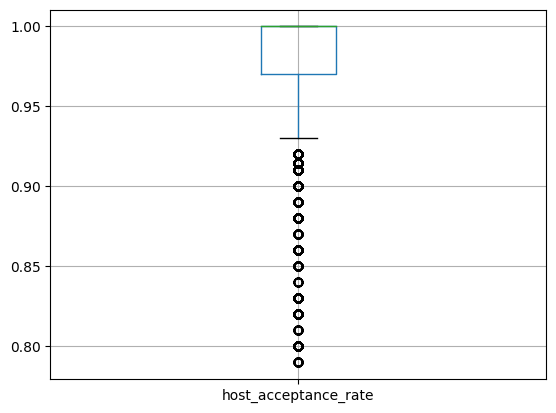

In [460]:
# Comprobamos la distribución de nuestra variable
import matplotlib.pyplot as plt
mexico.boxplot(column=["host_acceptance_rate"])
plt.show()

In [464]:
# Construimos el filtro 
pd.reset_option('display.max_rows')
mexico_acceptance = mexico[mexico["host_acceptance_rate"] > 0.90]
mexico_acceptance.head(3)

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.0,https://www.airbnb.com/rooms/2056638,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,Desconocido,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,"Mexico City, Mexico",Desconocido,within a day,f,https://a0.muscache.com/im/users/10531228/prof...,https://a0.muscache.com/im/users/10531228/prof...,Coyoacán,['phone'],t,f,Desconocido,Coyoacán,Entire loft,Entire home/apt,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",t,2023-03-30,2014-01-03,2018-06-24,f,2056638.0,2.023033e+13,10531228.0,1.000000,0.914562,3.0,7.0,19.35353,-99.16299,3.0,1.0,1.0,1.0,1434.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,19.0,49.0,324.0,21.0,0.0,0.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19
1,1.0,https://www.airbnb.com/rooms/2072354,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,"Mexico City, Mexico",Desconocido,Desconocido,f,https://a0.muscache.com/im/pictures/user/635c8...,https://a0.muscache.com/im/pictures/user/635c8...,Desconocido,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Coyoacán,Entire guest suite,Entire home/apt,"[""Free street parking"", ""Cleaning products"", ""...",t,2023-03-30,2014-01-01,2022-11-04,f,2072354.0,2.023033e+13,16840050.0,0.945388,0.914562,3.0,3.0,19.35358,-99.16948,2.0,1.0,1.0,1.0,830.0,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,11.0,41.0,71.0,346.0,61.0,1.0,0.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54
3,3.0,https://www.airbnb.com/rooms/35797,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",Desconocido,f,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,Desconocido,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,Entire villa,Entire home/apt,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",t,2023-03-29,00/00/00,00/00/00,f,35797.0,2.023033e+13,153786.0,0.945388,0.914562,1.0,1.0,19.38283,-99.20000,2.0,1.0,1.0,1.0,900.0,1.0,7.0,1.0,1.0,7.0,7.0,1.0,7.0,28.0,58.0,88.0,363.0,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00


In [465]:
# Comprobamos que el filtrado se haya realizado correctamente 
mexico_acceptance["host_acceptance_rate"].describe()

count    22677.000000
mean         0.983902
std          0.028360
min          0.910000
25%          0.980000
50%          1.000000
75%          1.000000
max          1.000000
Name: host_acceptance_rate, dtype: float64

### Registros con categoría “superhost”

In [466]:
# Realizamos el filtrado
mexico_super =mexico[mexico["host_is_superhost"] == "t"]

In [467]:
# Comprobamos el filtrado exitoso 
mexico_super["host_is_superhost"].describe()

count     8792
unique       1
top          t
freq      8792
Name: host_is_superhost, dtype: object

### Los registros que no hallan verificado identidad “ not identity_verified”

In [468]:
mexico_identity =mexico[mexico["host_identity_verified"] == "f"]

In [ ]:
# Comprobamos el filtrado exitoso 
mexico_identity["host_identity_verified"].value_counts()

### Los registros cuyo room_type = “Private room” y “Hotel room”

In [470]:
mexico_rotype = mexico[(mexico["room_type"] == "Private room") | (mexico["room_type"] == "Hotel room")]

In [471]:
# Comprobamos que el filtrado se haya realizado correctamente
mexico_rotype["room_type"].value_counts()

Private room    8202
Hotel room       127
Name: room_type, dtype: int64

### Los registros que cuenten con bathroom > 1

In [ ]:
mexico_bat =mexico[mexico["bathrooms_text"] > 1.0]
mexico_bat

In [ ]:
# Comprobamos el filtrado exitosomexico[]
mexico["bathrooms_text"].describe()

### Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”

#### Ajustamos el valor del precio debido a que nuestros datos van de 500 a 3000 pesos aproximadamente. Utilizaremos 2000 como valor

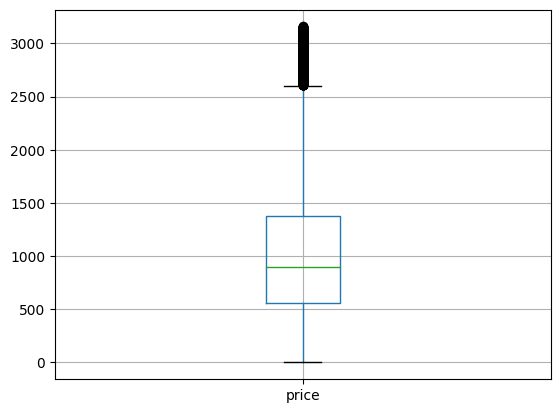

In [474]:
# Comprobamos la distribución de nuestra variable
import matplotlib.pyplot as plt
mexico.boxplot(column=["price"])
plt.show()

In [ ]:
mexico_ehome = mexico[(mexico["price"] > 2000) & (mexico["room_type"] == "Entire home/apt")]
mexico_ehome

### Los registros cuyo review_scores_cleanliness > 4.5

In [ ]:
mexico_score =mexico[mexico["review_scores_cleanliness"] > 4.9]
mexico_score["review_scores_cleanliness"].describe()

### Los registros cuyo review_scores_value > 4.9

In [ ]:
mexico_score =mexico[mexico["review_scores_value"] > 4.9]
mexico_score["review_scores_value"].describe()

### Los registros cuya availability_365< 100

In [ ]:
mexico_ava =mexico[mexico["availability_365"] > 100]
mexico_ava["availability_365"].describe()

### Los registros cuya host_response_time sea “within an hour”

In [484]:
mexico_time =mexico[mexico["host_response_time"] == "within an hour"]
mexico_time["host_response_time"].describe()

count              16996
unique                 1
top       within an hour
freq               16996
Name: host_response_time, dtype: object

# Generación de csv´s 

In [486]:
california_acceptance.to_csv("california_acceptance.csv")
california_super.to_csv("california_super.csv")
california_identity.to_csv("california_identity.csv")
california_rotype.to_csv("california_rotype.csv")
california_bat.to_csv("california_bat.csv")
california_ehome.to_csv("california_ehome.csv")
california_score.to_csv("california_score.csv")
california_score.to_csv("california_score.csv")
california_ava.to_csv("california_ava.csv")
california_time.to_csv("california_time.csv")

In [487]:
girona_acceptance.to_csv("girona_acceptance.csv")
girona_super.to_csv("girona_super.csv")
girona_identity.to_csv("girona_identity.csv")
girona_rotype.to_csv("girona_rotype.csv")
girona_bat.to_csv("girona_bat.csv")
girona_ehome.to_csv("girona_ehome.csv")
girona_score.to_csv("girona_score.csv")
girona_score.to_csv("girona_score.csv")
girona_ava.to_csv("girona_ava.csv")
girona_time.to_csv("girona_time.csv")

In [488]:
mexico_acceptance.to_csv("mexico_acceptance.csv")
mexico_super.to_csv("mexico_super.csv")
mexico_identity.to_csv("mexico_identity.csv")
mexico_rotype.to_csv("mexico_rotype.csv")
mexico_bat.to_csv("mexico_bat.csv")
mexico_ehome.to_csv("mexico_ehome.csv")
mexico_score.to_csv("mexico_score.csv")
mexico_ava.to_csv("mexico_ava.csv")
mexico_time.to_csv("mexico_time.csv")